In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# path_to_testfile = "./instances_v2/instances/fpg-poly_0000000020_h1.instance.json"
#path_to_testfile = "./instances_v2/instances/socg60.instance.json"
path_to_testfile = "../instances/socg60.instance.json"

with open(path_to_testfile) as testfile:
    polygon = json.load(testfile)

In [3]:
print(polygon['type'])
print(polygon['name'])
print(polygon['n'])
print(polygon['outer_boundary'])
print(polygon['holes'])


CGSHOP2023_Instance
socg60
60
[{'x': 112, 'y': 736}, {'x': 112, 'y': 704}, {'x': 144, 'y': 704}, {'x': 144, 'y': 672}, {'x': 109, 'y': 672}, {'x': 109, 'y': 704}, {'x': 64, 'y': 704}, {'x': 64, 'y': 672}, {'x': 16, 'y': 672}, {'x': 16, 'y': 640}, {'x': 64, 'y': 640}, {'x': 64, 'y': 624}, {'x': 16, 'y': 624}, {'x': 16, 'y': 592}, {'x': 64, 'y': 592}, {'x': 64, 'y': 560}, {'x': 109, 'y': 560}, {'x': 109, 'y': 592}, {'x': 144, 'y': 592}, {'x': 144, 'y': 560}, {'x': 112, 'y': 560}, {'x': 112, 'y': 528}, {'x': 144, 'y': 528}, {'x': 144, 'y': 480}, {'x': 176, 'y': 480}, {'x': 176, 'y': 528}, {'x': 192, 'y': 528}, {'x': 192, 'y': 480}, {'x': 224, 'y': 480}, {'x': 224, 'y': 528}, {'x': 256, 'y': 528}, {'x': 256, 'y': 560}, {'x': 224, 'y': 560}, {'x': 224, 'y': 592}, {'x': 259, 'y': 592}, {'x': 259, 'y': 560}, {'x': 304, 'y': 560}, {'x': 304, 'y': 592}, {'x': 352, 'y': 592}, {'x': 352, 'y': 624}, {'x': 304, 'y': 624}, {'x': 304, 'y': 640}, {'x': 352, 'y': 640}, {'x': 352, 'y': 672}, {'x': 304, 

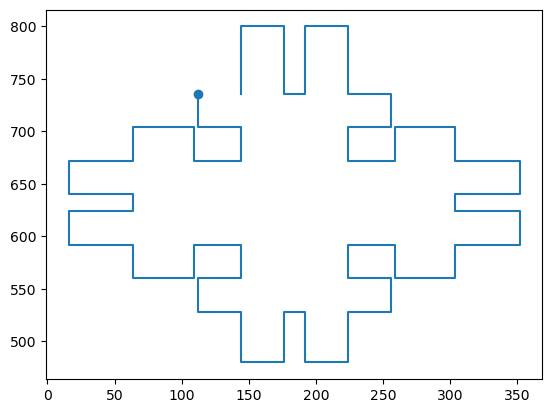

In [4]:
listpolygon = []
for pt in polygon['outer_boundary']:
    listpolygon.append([pt['x'], pt['y']])

listpolygon = np.array(listpolygon)

plt.plot(listpolygon.T[0], listpolygon.T[1])
# plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
plt.scatter(listpolygon[0][0], listpolygon[0][1])

for hole in polygon['holes']:
    listhole = []
    for pt in hole:
        listhole.append([pt['x'], pt['y']])
    
    listhole = np.array(listhole)

    plt.plot(listhole.T[0], listhole.T[1])
    # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
    plt.scatter(listhole[0][0], listhole[0][1])

plt.show()



In [30]:
class Point:
    def __init__(self, x, y, parent, incoming, outgoing):
        self.coordinate = (x,y)
        self.parent = parent
        self.incoming = incoming
        self.outgoing = outgoing

class Edge:
    def __init__(self, pt1, pt2, parent):
        self.pt1 = pt1
        self.pt2 = pt2
        self.parent = parent

class Polygon:
    def __init__(self, isHole, points, edges, holes):
        self.isHole = isHole
        self.points = points
        self.edges = edges
        if isHole == 0: 
            self.holes = holes
        else:
            self.holes = None

listpts = []
listholepts = []
listedges = []
listholeedges = []
listpolygons = []
listholepolygons = []


#Create points + Edges
for pt in polygon['outer_boundary']:
    (x,y) = [pt['x'], pt['y']]
    p = Point(x,y, None, None, None)
    listpts.append(p)

counter = 0
for pt in listpts:
    e = Edge(listpts[counter].coordinate, listpts[counter-1].coordinate, None)
    #print(listpts[counter].incoming, e, counter)
    listedges.append(e)
    counter +=1
    #listpts[counter].incoming = e

#TODO: Update adjacent edges of a point
z = len(listpts)
for i in range(z):
    #print(listpts[i].coordinate, listedges[i].pt1, listedges[i].pt2)
    listpts[i].incoming = listedges[i]
    #print(i, x)
    if i < z-1:
        listpts[i].outgoing = listedges[i+1]
    else:
        listpts[i].outgoing = listedges[0]

counter = 0
p = Polygon(0, listpts, listedges, None)
for edges in p.edges:
    edges.parent = p #Update edges parent
for pts in p.points:
    pts.parent = p #Update point parent
print(len(p.edges), len(p.points))

#create same for holes 
# TODO: Check how to work with this when we have >1 hole and update this accordingly  
for pt in polygon['holes']:
    (x,y) = [pt['x'], pt['y']]
    p = Point(x,y, None, None, None)
    listpts.append(p)
    listholepts.append(p)

counter = 0
for pt in listholepts:
    e = Edge(listholepts[counter].coordinate, listholepts[counter-1].coordinate, None)
    listedges.append(e)
    listholeedges.append(e)
    counter +=1

#TODO: Update adjacent edges of a point
z = len(listpts)
for i in range(z):
    #print(listpts[i].coordinate, listedges[i].pt1, listedges[i].pt2)
    listholepts[i].incoming = listholeedges[i]
    #print(i, x)
    if i < z-1:
        listholepts[i].outgoing = listholeedges[i+1]
    else:
        listholepts[i].outgoing = listholeedges[0]
        
counter = 0
h = Polygon(1, listholepts, listholeedges, None)
for edges in h.edges:
    edges.parent = p #Update edges parent
for pts in h.points:
    pts.parent = p #Update point parent

#for e in p.edges:
    #print(e.pt1, e.pt2, e.parent)
#for pts in p.points:
    #print(pts.coordinate, pts.parent, pts.incoming.pt1, pts.incoming.pt2, pts.outgoing.pt1, pts.outgoing.pt2)
#for e in h.edges:
    #print(e.pt1, e.pt2, e.parent)
#for pts in h.points:
    #print(pts.coordinate, pts.parent)
#print(p.edges)

60 60
(112, 736) <__main__.Polygon object at 0x000001FA1E56C730> (112, 736) (144, 736) (112, 704) (112, 736)
(112, 704) <__main__.Polygon object at 0x000001FA1E56C730> (112, 704) (112, 736) (144, 704) (112, 704)
(144, 704) <__main__.Polygon object at 0x000001FA1E56C730> (144, 704) (112, 704) (144, 672) (144, 704)
(144, 672) <__main__.Polygon object at 0x000001FA1E56C730> (144, 672) (144, 704) (109, 672) (144, 672)
(109, 672) <__main__.Polygon object at 0x000001FA1E56C730> (109, 672) (144, 672) (109, 704) (109, 672)
(109, 704) <__main__.Polygon object at 0x000001FA1E56C730> (109, 704) (109, 672) (64, 704) (109, 704)
(64, 704) <__main__.Polygon object at 0x000001FA1E56C730> (64, 704) (109, 704) (64, 672) (64, 704)
(64, 672) <__main__.Polygon object at 0x000001FA1E56C730> (64, 672) (64, 704) (16, 672) (64, 672)
(16, 672) <__main__.Polygon object at 0x000001FA1E56C730> (16, 672) (64, 672) (16, 640) (16, 672)
(16, 640) <__main__.Polygon object at 0x000001FA1E56C730> (16, 640) (16, 672) (64,

# Useful functions?

In [6]:
def pt2np(pt):
    return np.array([pt['x'], pt['y']])

In [7]:
#returns the orientation of p3 wrt line through p1 and p2
def orientation(p1, p2, p3):

    #vector from p1 to p2
    a = [(int(p2['x']) - int(p1['x'])), (int(p2['y']) - int(p1['y']))]
    #vector from p1 to p3
    b = [(int(p3['x']) - int(p1['x'])), (int(p3['y']) - int(p1['y']))]

    #cross product
    cross = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

    if cross == 0: #colinear
        return 0
    else: #sign gives left or right of \bar{p1p2}
        return np.sign(cross)

In [8]:
def find_reflex(polygon):
    n = polygon['n']
    bdry = polygon['outer_boundary']
    holes = polygon['holes']
    count = 0
    reflex = []

    for i in range(len(bdry)):
        if orientation(bdry[(i-1)], bdry[i], bdry[(i+1) % len(bdry)]) == -1: reflex.append(bdry[i]); count += 1

    for hole in holes:
        for i in range(len(hole)):
            if orientation(hole[(i-1)], hole[i], hole[(i+1) % len(hole)]) == -1: reflex.append(hole[i]); count += 1

    return reflex, count

In [9]:
reflex, r = find_reflex(polygon)

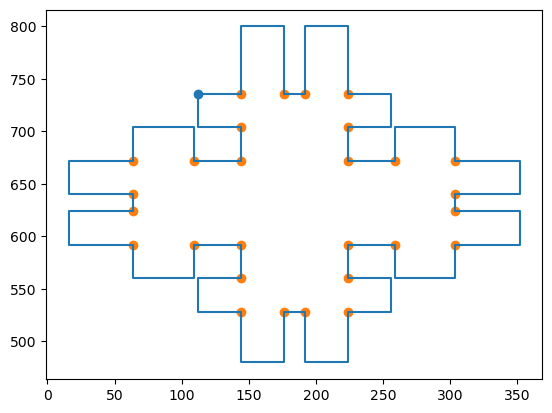

In [10]:
listpolygon = [[polygon['outer_boundary'][-1]['x'], polygon['outer_boundary'][-1]['y']]]
for pt in polygon['outer_boundary']:
    listpolygon.append([pt['x'], pt['y']])

listpolygon = np.array(listpolygon)

plt.plot(listpolygon.T[0], listpolygon.T[1])
# plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
plt.scatter(listpolygon[1][0], listpolygon[1][1])

for hole in polygon['holes']:
    listhole = [[hole[-1]['x'], hole[-1]['y']]]
    for pt in hole:
        listhole.append([pt['x'], pt['y']])
    
    listhole = np.array(listhole)

    plt.plot(listhole.T[0], listhole.T[1])
    # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
    plt.scatter(listhole[1][0], listhole[1][1])

listreflex = []
for pt in reflex:
    listreflex.append([pt['x'], pt['y']])

listreflex = np.array(listreflex)

plt.scatter(listreflex.T[0], listreflex.T[1])

plt.show()